<a href="https://colab.research.google.com/github/AnwHus007/ML-Lab/blob/main/ML_Project_Flood_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/MLR/train.csv')
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [5]:
df1 = df.copy()
df1 = df1.drop('id',axis=1)
df1.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


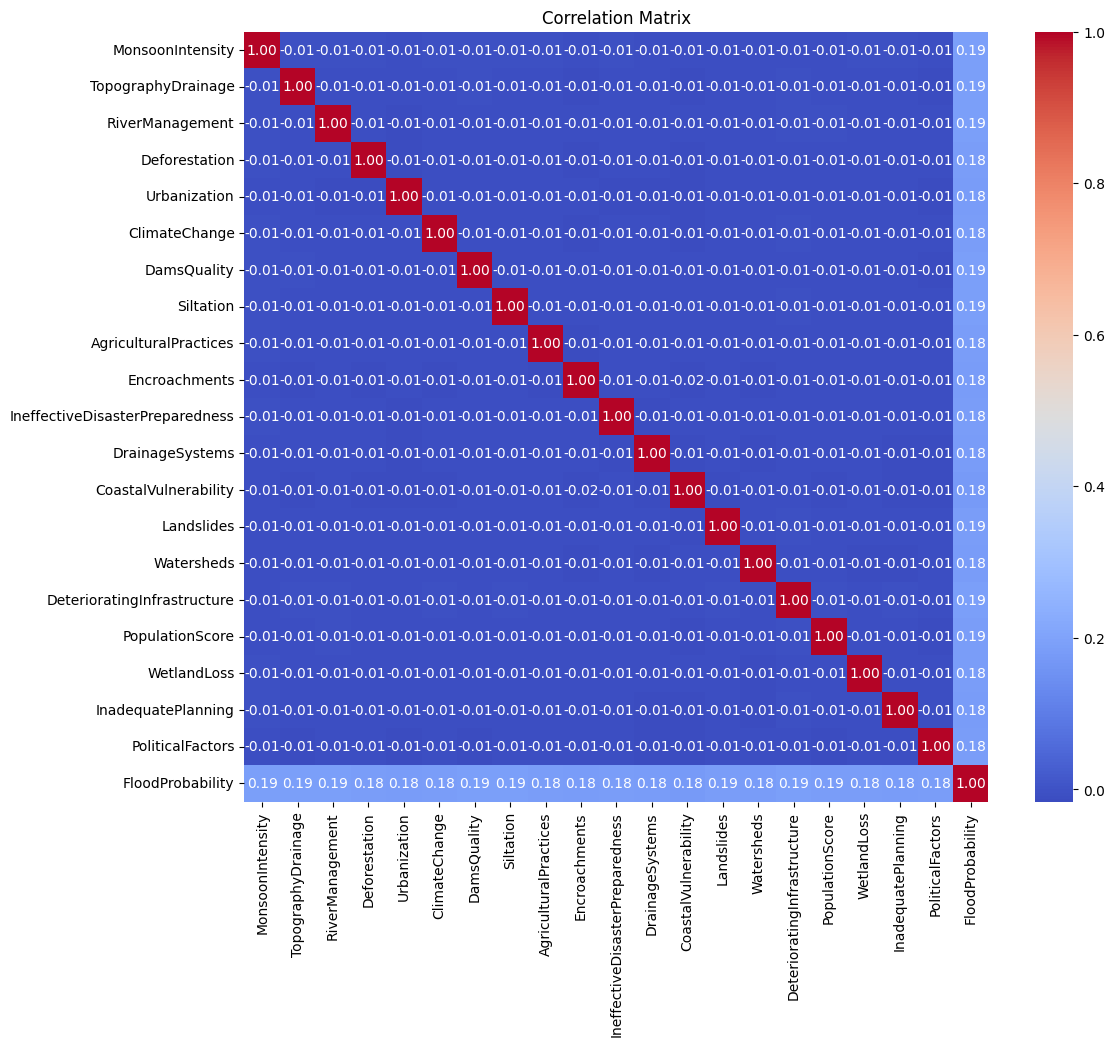

In [6]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-7-d0121dbb447b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FloodProbability'], kde=True)


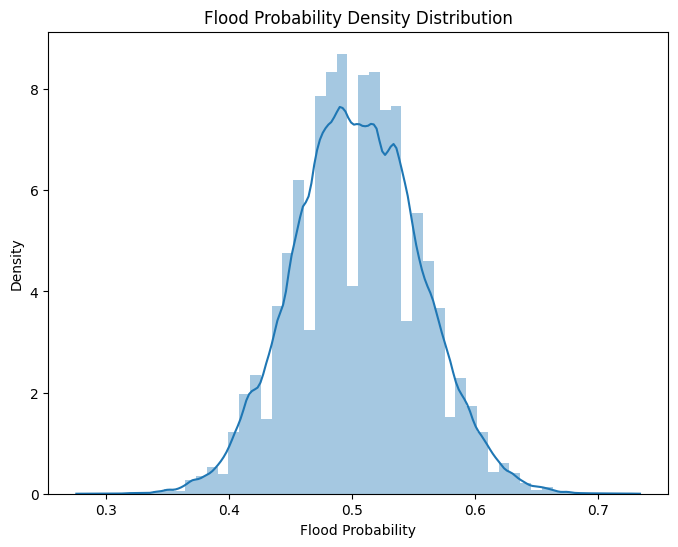

In [7]:
plt.figure(figsize=(8, 6))
sns.distplot(df['FloodProbability'], kde=True)
plt.title('Flood Probability Density Distribution')
plt.xlabel('Flood Probability')
plt.ylabel('Density')
plt.show()

In [31]:
X = df1.drop('FloodProbability', axis=1)
y = df1['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
Mat_X = X_train.values
Mat_Y = y_train.values
print(Mat_X)

[[ 8  7  7 ...  6  4  7]
 [ 7  4  4 ...  4  3  4]
 [ 6  5  1 ...  3  5  3]
 ...
 [ 5  4  1 ...  6  7  7]
 [ 6 10  4 ...  4  5  5]
 [ 5  7  2 ...  4  4  7]]


In [17]:
ones_column = np.ones((Mat_X.shape[0], 1))
Mat_X_ones = np.hstack((ones_column, Mat_X))

print(Mat_X_ones)

[[ 1.  8.  7. ...  6.  4.  7.]
 [ 1.  7.  4. ...  4.  3.  4.]
 [ 1.  6.  5. ...  3.  5.  3.]
 ...
 [ 1.  5.  4. ...  6.  7.  7.]
 [ 1.  6. 10. ...  4.  5.  5.]
 [ 1.  5.  7. ...  4.  4.  7.]]


In [18]:
import numpy as np

X_transpose = Mat_X_ones.transpose()
X_transpose_X = np.dot(X_transpose, Mat_X_ones)
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
X_transpose_X_inverse_X_transpose = np.dot(X_transpose_X_inverse, X_transpose)
result = np.dot(X_transpose_X_inverse_X_transpose, Mat_Y)

print(result)

[-0.05332623  0.00561301  0.00564511  0.00566241  0.00568108  0.00565937
  0.00565875  0.00565295  0.00563975  0.00563934  0.00564593  0.00563953
  0.00563264  0.00567107  0.00564308  0.00564769  0.00561824  0.00568149
  0.0056395   0.00561202  0.00564552]


In [26]:
intercept = result[0]
coefficients = result[1:]

equation = f"FloodProbability = {intercept:}"
for i in range(len(coefficients)):
  equation += f" + {coefficients[i]:} * {X.columns[i]}"

print("Linear Equation (from calculated coefficients):")
print(equation)


Linear Equation (from calculated coefficients):
FloodProbability = -0.053326226142744695 + 0.005613007585057791 * MonsoonIntensity + 0.005645111619444368 * TopographyDrainage + 0.005662406667456729 * RiverManagement + 0.005681075400864595 * Deforestation + 0.00565936633059087 * Urbanization + 0.0056587534943814315 * ClimateChange + 0.005652952067866536 * DamsQuality + 0.0056397523298801055 * Siltation + 0.005639338761103295 * AgriculturalPractices + 0.005645931046401961 * Encroachments + 0.005639529702251117 * IneffectiveDisasterPreparedness + 0.005632642144875938 * DrainageSystems + 0.005671065305432209 * CoastalVulnerability + 0.005643084292123113 * Landslides + 0.005647691195635114 * Watersheds + 0.00561824100116884 * DeterioratingInfrastructure + 0.0056814861973557415 * PopulationScore + 0.005639502380788041 * WetlandLoss + 0.005612024998877814 * InadequatePlanning + 0.005645522313265901 * PoliticalFactors


In [29]:
ones_column_test = np.ones((X_test.shape[0], 1))
X_test_ones = np.hstack((ones_column_test, X_test.values))
y_pred = np.dot(X_test_ones, result)

mse_calculated = mean_squared_error(y_test, y_pred)
r2_calculated = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_calculated}")
print(f"R-squared: {r2_calculated}")


Mean Squared Error: 0.0004032065870905584
R-squared: 0.8448773362840328


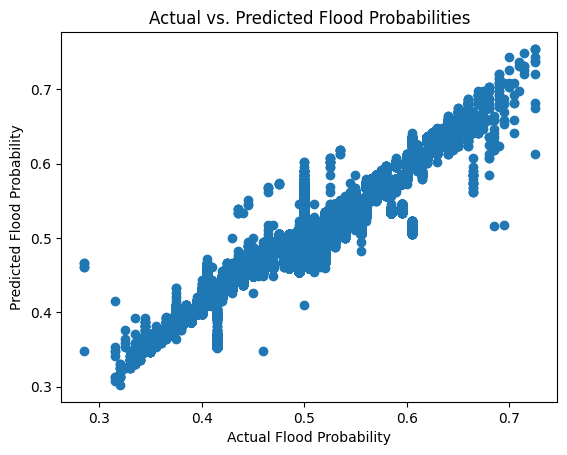

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.title('Actual vs. Predicted Flood Probabilities')
plt.show()